In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition, ensemble, linear_model, manifold, metrics, model_selection, pipeline

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
training_df = pd.read_csv("../data/digit-recognizer/train.csv")
testing_df = pd.read_csv("../data/digit-recognizer/test.csv")

# Principal Components Analysis

In [4]:
X = training_df.drop("label", axis=1)
y = training_df.loc[:, "label"]

In [4]:
# rows of VT or columns of VT.T are the principal components
U, s, VT = np.linalg.svd(X - X.mean(axis=0))

In [5]:
n_components = 4
W = VT.T[:, :4]
low_dimensional_projection = X @ W

## Using Scikit-Learn

In [40]:
decomposition.PCA?

Init signature:
decomposition.PCA(
    n_components=None,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA)

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float, None or string
    Number of components to keep.
    if n_component

In [6]:
# compute the full SVD
pca = decomposition.PCA(n_components=None, svd_solver="full")
Z = pca.fit_transform(X)

In [7]:
Z.shape

(42000, 784)

### Explained Variance Ratio

In [8]:
# most of the components add very little value in terms of explained variance
pca.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

### Choosing the right number of dimensions

In [9]:
# by hand calculate the number of required components and then re-fit PCA
n_components = sum(np.cumsum(pca.explained_variance_ratio_) < 0.99) + 1

In [10]:
n_components

331

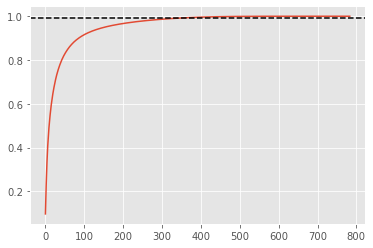

In [11]:
_ = plt.plot(np.cumsum(pca.explained_variance_ratio_))
_ = plt.axhline(0.99, c="k", linestyle="dashed")

In [12]:
pca = decomposition.PCA(n_components=0.99, svd_solver="full")
Z = pca.fit_transform(X)

In [13]:
Z.shape

(42000, 331)

### Randomized PCA

Can use more efficient algorithm to approximate principal components but need to explicitly set the number of components.

In [14]:
_random_state = np.random.RandomState(42)
pca = decomposition.PCA(n_components=331, svd_solver="randomized", random_state=_random_state)
Z = pca.fit_transform(X)

### Incremental PCA

Can apply PCA to mini-batches of data which makes PCA potentially useful as a pre-processing technique for pipelines applied to large data sets or for online learning situations.

In [15]:
n_batches = 100
incremental_pca = decomposition.IncrementalPCA(n_components=331)
for X_batch in np.array_split(X, n_batches):
    incremental_pca.partial_fit(X_batch)

# Kernel PCA

In [62]:
decomposition.KernelPCA?

Init signature:
decomposition.KernelPCA(
    n_components=None,
    kernel='linear',
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None,
    alpha=1.0,
    fit_inverse_transform=False,
    eigen_solver='auto',
    tol=0,
    max_iter=None,
    remove_zero_eig=False,
    random_state=None,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Kernel Principal component analysis (KPCA)

Non-linear dimensionality reduction through the use of kernels (see
:ref:`metrics`).

Read more in the :ref:`User Guide <kernel_PCA>`.

Parameters
----------
n_components : int, default=None
    Number of components. If None, all non-zero components are kept.

kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
    Kernel. Default="linear".

gamma : float, default=1/n_features
    Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
    kernels.

degree : int, default=3
    Degree for poly kernels. Ignored by other kernels.

coef0 : float, default=1
   

In [16]:
kernel_pca = decomposition.KernelPCA(n_components=2, kernel="linear")
Z = kernel_pca.fit_transform(X)

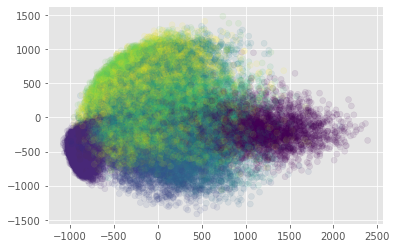

In [17]:
_ = plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.1)

In [18]:
kernel_pca = decomposition.KernelPCA(n_components=2, kernel="rbf")
Z = kernel_pca.fit_transform(X)

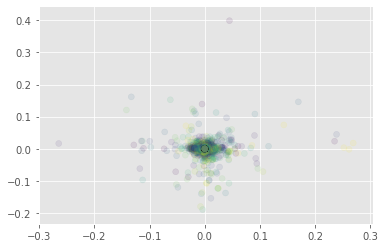

In [19]:
_ = plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.1)

In [20]:
kernel_pca = decomposition.KernelPCA(n_components=2, kernel="sigmoid")
Z = kernel_pca.fit_transform(X)

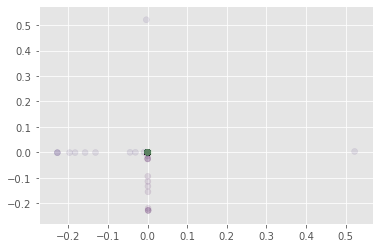

In [21]:
_ = plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.1)

## Selecting a Kernel and Tuning Hyper-parameters

Since PCA techniques are typically used a preprocessing step of some supervised learning pipeline you can treat the parameters of the PCA algorithm as hyper-parameters of the pipeline to optimize.

In [7]:
_random_state = np.random.RandomState(42)

clf = pipeline.Pipeline([
        ("kpca", decomposition.KernelPCA(eigen_solver="arpack", n_jobs=1, random_state=_random_state)),
        ("logistic_regression", linear_model.LogisticRegression(multi_class="multinomial", n_jobs=1, solver="sag", random_state=_random_state))
    ])

param_grid = [{
        "kpca__n_components": [5, 25, 125],
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
grid_search = model_selection.GridSearchCV(clf, param_grid, cv=_cv, n_jobs=5, verbose=10)
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  4.3min


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

## Select hyper-parameters to minimize reconstruction error

In [12]:
reconstruction_errors = []
for n_components in range(2, 785):
    _random_state = np.random.RandomState(42)
    pca = decomposition.PCA(n_components, svd_solver="randomized", random_state=_random_state)
    Z = pca.fit_transform(X)
    X_pre_image = pca.inverse_transform(Z)
    reconstruction_error = np.sqrt(metrics.mean_squared_error(X, X_pre_image))
    reconstruction_errors.append(reconstruction_error)

Text(0, 0.5, 'Reconstruction Error')

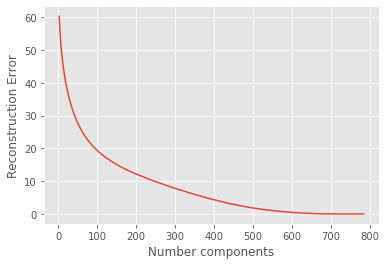

In [13]:
plt.plot(range(2, 785), reconstruction_errors)
plt.xlabel("Number components")
plt.ylabel("Reconstruction Error")

# Using PCA to speed up classification algorithms

In [17]:
_random_state = np.random.RandomState(42)

_steps = [
    ("random_forest_classifier", ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=_random_state))
]
classification_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)

In [18]:
%%time
_scores = model_selection.cross_val_score(classification_pipeline, X, y, cv=5, n_jobs=5)
_scores.mean()

CPU times: user 0 ns, sys: 264 ms, total: 264 ms
Wall time: 3.78 s


0.9638338232559704

In [19]:
_random_state = np.random.RandomState(42)

_steps = [
    ("pca", decomposition.PCA(n_components=0.95, random_state=_random_state)),
    ("random_forest_classifier", ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=_random_state))
]
classification_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)

In this case PCA actually slows down training and makes classifier less accurate!

In [20]:
%%time
_scores = model_selection.cross_val_score(classification_pipeline, X, y, cv=5, n_jobs=5)
_scores.mean()

CPU times: user 637 ms, sys: 0 ns, total: 637 ms
Wall time: 35.5 s


0.9402859621129146

In [23]:
_random_state = np.random.RandomState(42)

_steps = [
    ("logistic_regression", linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=_random_state))
]
classification_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)

In [24]:
%%time
_scores = model_selection.cross_val_score(classification_pipeline, X, y, cv=5, n_jobs=5)
_scores.mean()

CPU times: user 133 ms, sys: 110 ms, total: 242 ms
Wall time: 33.6 s


0.9160472817476704

In [25]:
_random_state = np.random.RandomState(42)

_steps = [
    ("pca", decomposition.PCA(n_components=0.95, random_state=_random_state)),
    ("logistic_regression", linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=_random_state))
]
classification_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)

In [26]:
%%time
_scores = model_selection.cross_val_score(classification_pipeline, X, y, cv=5, n_jobs=5)
_scores.mean()

CPU times: user 2.45 ms, sys: 250 ms, total: 253 ms
Wall time: 49.3 s


0.9143093988203562

# Other dimensionality reduction techniques

## Multi-dimensional scaling

In [8]:
manifold.MDS?

Init signature:
manifold.MDS(
    n_components=2,
    metric=True,
    n_init=4,
    max_iter=300,
    verbose=0,
    eps=0.001,
    n_jobs=None,
    random_state=None,
    dissimilarity='euclidean',
)
Docstring:     
Multidimensional scaling

Read more in the :ref:`User Guide <multidimensional_scaling>`.

Parameters
----------
n_components : int, optional, default: 2
    Number of dimensions in which to immerse the dissimilarities.

metric : boolean, optional, default: True
    If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.

n_init : int, optional, default: 4
    Number of times the SMACOF algorithm will be run with different
    initializations. The final results will be the best output of the runs,
    determined by the run with the smallest final stress.

max_iter : int, optional, default: 300
    Maximum number of iterations of the SMACOF algorithm for a single run.

verbose : int, optional, default: 0
    Level of verbosity.

eps : float, optional, default: 1e

In [9]:
_random_state = np.random.RandomState(42)

_steps = [
    ("mds", manifold.MDS(dissimilarity="euclidean", n_components=2, n_jobs=-1, random_state=_random_state))
]
visualizer_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)
Z = visualizer_pipeline.fit_transform(X)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
_ = plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.1)

In [9]:
manifold.TSNE?

Init signature:
manifold.TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000,
    n_iter_without_progress=300,
    min_grad_norm=1e-07,
    metric='euclidean',
    init='random',
    verbose=0,
    random_state=None,
    method='barnes_hut',
    angle=0.5,
)
Docstring:     
t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e.g. 50)
if the number of features is 

In [7]:
_random_state = np.random.RandomState(42)

_steps = [
    ("pca", decomposition.PCA(n_components=0.95, random_state=_random_state)),
    ("tsne", manifold.TSNE(n_components=2, random_state=_random_state))
]
visualizer_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)
Z = visualizer_pipeline.fit_transform(X)

[Pipeline] ............... (step 1 of 2) Processing pca, total=   4.8s
[Pipeline] .............. (step 2 of 2) Processing tsne, total=16.7min


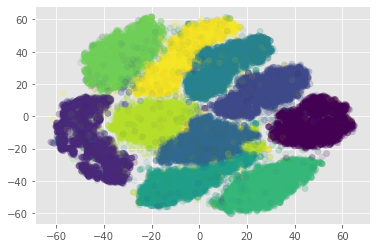

In [8]:
_ = plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.1)

## Locally Linear Embedding

In [10]:
manifold.LocallyLinearEmbedding?

Init signature:
manifold.LocallyLinearEmbedding(
    n_neighbors=5,
    n_components=2,
    reg=0.001,
    eigen_solver='auto',
    tol=1e-06,
    max_iter=100,
    method='standard',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='auto',
    random_state=None,
    n_jobs=None,
)
Docstring:     
Locally Linear Embedding

Read more in the :ref:`User Guide <locally_linear_embedding>`.

Parameters
----------
n_neighbors : integer
    number of neighbors to consider for each point.

n_components : integer
    number of coordinates for the manifold

reg : float
    regularization constant, multiplies the trace of the local covariance
    matrix of the distances.

eigen_solver : string, {'auto', 'arpack', 'dense'}
    auto : algorithm will attempt to choose the best method for input data

    arpack : use arnoldi iteration in shift-invert mode.
                For this method, M may be a dense matrix, sparse matrix,
                or general linear operator.
       

In [5]:
_random_state = np.random.RandomState(42)

_steps = [
    ("locally_linear_embedding", manifold.LocallyLinearEmbedding(method="standard", n_components=2, n_jobs=-1, random_state=_random_state))
]
visualizer_pipeline = pipeline.Pipeline(steps=_steps, verbose=True)
Z = visualizer_pipeline.fit_transform(X)

[Pipeline]  (step 1 of 1) Processing locally_linear_embedding, total=45.3min


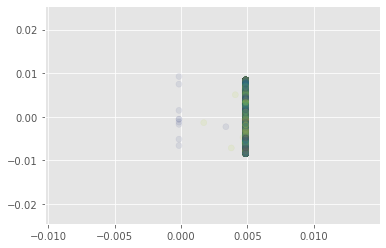

In [6]:
_ = plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.1)